In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\User\Downloads\realtor-data.zip.csv")

In [5]:
df.shape

(2226382, 12)

In [6]:
df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df = df.dropna()

In [9]:
df = df.reset_index(drop = True)

In [10]:
df.shape

(1084909, 12)

In [11]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
1,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
3,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
4,67455.0,for_sale,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,2012-10-12


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084909 entries, 0 to 1084908
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   brokered_by     1084909 non-null  float64
 1   status          1084909 non-null  object 
 2   price           1084909 non-null  float64
 3   bed             1084909 non-null  float64
 4   bath            1084909 non-null  float64
 5   acre_lot        1084909 non-null  float64
 6   street          1084909 non-null  float64
 7   city            1084909 non-null  object 
 8   state           1084909 non-null  object 
 9   zip_code        1084909 non-null  float64
 10  house_size      1084909 non-null  float64
 11  prev_sold_date  1084909 non-null  object 
dtypes: float64(8), object(4)
memory usage: 99.3+ MB


In [13]:
df.state.value_counts().head(6)

state
California      157724
Florida         107570
Texas           106040
Arizona          50269
Pennsylvania     42670
Georgia          42384
Name: count, dtype: int64

### EDA on California, Florida, Pennsyvalnia, Arizona and Texas

In [14]:
data = df[(df.state == 'California')|(df.state == 'Texas') | (df.state == 'Florida') | (df.state == 'Arizona') | (df.state == 'Pennsylvania')].reset_index(drop = True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464273 entries, 0 to 464272
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   brokered_by     464273 non-null  float64
 1   status          464273 non-null  object 
 2   price           464273 non-null  float64
 3   bed             464273 non-null  float64
 4   bath            464273 non-null  float64
 5   acre_lot        464273 non-null  float64
 6   street          464273 non-null  float64
 7   city            464273 non-null  object 
 8   state           464273 non-null  object 
 9   zip_code        464273 non-null  float64
 10  house_size      464273 non-null  float64
 11  prev_sold_date  464273 non-null  object 
dtypes: float64(8), object(4)
memory usage: 42.5+ MB


### Checking the number of unique values in each features

In [16]:
data.nunique()

brokered_by        37983
status                 2
price              21471
bed                   58
bath                  56
acre_lot            3492
street            427351
city                4321
state                  5
zip_code            5668
house_size          8337
prev_sold_date     12150
dtype: int64

In [17]:
data.bath.unique()

array([  3.,   1.,   2.,   4.,   5.,   7.,   6.,   8.,  10.,  11.,   9.,
        14.,  17.,  12.,  18.,  15.,  13.,  21.,  16.,  22.,  19.,  69.,
        24.,  70.,  25.,  20.,  27.,  54.,  36.,  30.,  44.,  49.,  78.,
        35.,  47.,  32.,  28.,  40.,  26.,  66.,  37.,  33.,  42.,  48.,
        39.,  38., 108.,  34.,  64.,  23.,  29., 175.,  53.,  99.,  45.,
        50.])

In [18]:
data = data[data.city != 'California']

In [19]:
data = data.sort_values('prev_sold_date')

In [20]:
data.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,464265.000000,4.642650e+05,464265.000000,464265.000000,464265.000000,4.642650e+05,464265.000000,4.642650e+05
mean,53140.745458,7.038986e+05,3.309041,2.522314,10.294220,9.281851e+05,67895.855744,1.999001e+03
std,30642.184532,1.605311e+06,1.231918,1.273989,792.080869,5.255810e+05,27828.584309,2.563989e+03
min,4.000000,1.000000e+00,1.000000,1.000000,0.000000,2.905000e+03,11745.000000,1.000000e+02
25%,23592.000000,2.920000e+05,3.000000,2.000000,0.130000,4.713890e+05,33928.000000,1.335000e+03
50%,52985.000000,4.409900e+05,3.000000,2.000000,0.180000,9.192330e+05,77541.000000,1.750000e+03
75%,79290.000000,7.250000e+05,4.000000,3.000000,0.290000,1.386473e+06,92037.000000,2.343000e+03
max,110142.000000,5.150000e+08,108.000000,175.000000,100000.000000,2.001125e+06,96161.000000,1.560780e+06


### Handling the Outliers 

In [33]:
num_df = data.select_dtypes([int,float])
for col in num_df.columns:
    if col == 'brokered_by' or col == 'street' or col == 'zip_code':
        continue
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + (1.5*IQR)
    lower = Q1 - (1.5*IQR)
    mask = (data[col] > upper) | (data[col] < lower)
    data = data[~(mask)]

In [34]:
data.shape

(290712, 12)

In [36]:
data.to_csv('cleaned_realtor_zip.csv')

In [38]:
data = pd.read_csv('cleaned_realtor_zip.csv')

In [39]:
data.nunique()

Unnamed: 0        290712
brokered_by        29774
status                 2
price              14287
bed                    4
bath                   4
acre_lot              34
street            267387
city                3220
state                  5
zip_code            4673
house_size          2644
prev_sold_date     10684
dtype: int64

### Checking if a House was resold or not 

In [40]:
resold = data.groupby(['bed','street','bath','acre_lot','city','state','zip_code','house_size']).size().reset_index(name = 'count').sort_values('count', ascending = False)

In [41]:
resold.head()

,bed,street,bath,acre_lot,city,state,zip_code,house_size,count
95438,3.0,632472.0,2.0,0.02,Philadelphia,Pennsylvania,19130.0,1734.0,3
233815,4.0,1174592.0,2.0,0.06,Upper Darby,Pennsylvania,19082.0,1612.0,3
51151,3.0,44584.0,1.0,0.06,Darby,Pennsylvania,19023.0,1232.0,3
97492,3.0,662730.0,2.0,0.24,Ocala,Florida,34472.0,1559.0,3
136357,3.0,1164059.0,2.0,0.03,Upper Darby,Pennsylvania,19082.0,1644.0,3


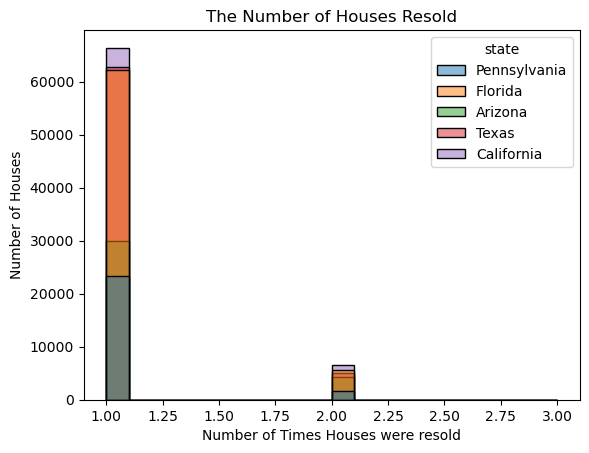

In [42]:
sns.histplot(x = 'count', data =  resold, hue = 'state')
plt.xlabel('Number of Times Houses were resold')
plt.ylabel('Number of Houses')
plt.title('The Number of Houses Resold')
plt.show()

In [43]:
resold[resold['count'] == 3]

,bed,street,bath,acre_lot,city,state,zip_code,house_size,count
95438,3.0,632472.0,2.0,0.02,Philadelphia,Pennsylvania,19130.0,1734.0,3
233815,4.0,1174592.0,2.0,0.06,Upper Darby,Pennsylvania,19082.0,1612.0,3
51151,3.0,44584.0,1.0,0.06,Darby,Pennsylvania,19023.0,1232.0,3
97492,3.0,662730.0,2.0,0.24,Ocala,Florida,34472.0,1559.0,3
136357,3.0,1164059.0,2.0,0.03,Upper Darby,Pennsylvania,19082.0,1644.0,3
75462,3.0,365163.0,1.0,0.04,Marcus Hook,Pennsylvania,19061.0,1210.0,3
130907,3.0,1090422.0,3.0,0.01,Philadelphia,Pennsylvania,19148.0,1842.0,3
137649,3.0,1180872.0,2.0,0.11,Phoenix,Arizona,85028.0,1764.0,3


### Generating Statistical Summary

In [44]:
data.describe()

,Unnamed: 0,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,290712.000000,290712.000000,290712.000000,290712.000000,290712.000000,290712.000000,2.907120e+05,290712.000000,290712.000000
mean,231009.350347,53985.027863,410714.147269,3.138783,2.227025,0.156105,9.339698e+05,66248.376170,1684.629482
std,131960.049136,30361.281211,194372.808701,0.744591,0.683710,0.070428,5.259293e+05,27652.237613,531.491008
min,2.000000,4.000000,1.000000,2.000000,1.000000,0.000000,6.085000e+03,15001.000000,198.000000
25%,114085.750000,26022.000000,266000.000000,3.000000,2.000000,0.110000,4.747460e+05,33844.000000,1281.000000
50%,237506.500000,53016.000000,375000.000000,3.000000,2.000000,0.160000,9.307935e+05,77379.000000,1614.000000
75%,337569.250000,79307.000000,529000.000000,4.000000,3.000000,0.200000,1.391824e+06,91301.000000,2021.000000
max,464272.000000,110142.000000,923000.000000,5.000000,4.000000,0.330000,2.001125e+06,96161.000000,3131.000000


In [45]:
data = data[data.acre_lot != 0.00]

### Checking the Distribution of Each Feature

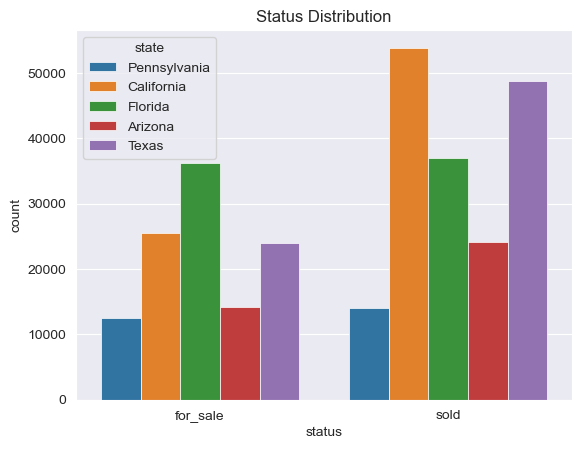

In [46]:
sns.set_style('darkgrid')
sns.countplot(x = 'status', hue = 'state', data = data, linewidth = 0.5)
plt.title('Status Distribution')
plt.show()

#### Insights
1. California has the highest record of sold houses.
2. Florida has the highest record of houses for sale and it almost have equal distribution of sold and for sale houses.
3. Houses for sale and sold in pennsylvania are not quite much.
4. Houses for sale in texas are also quite much.

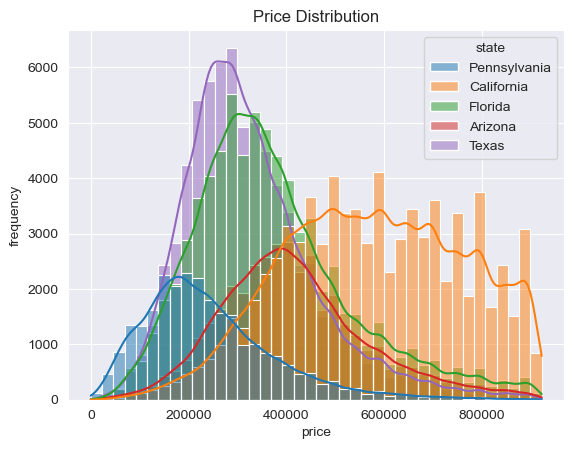

In [47]:
sns.set_style('darkgrid')
sns.histplot(x = 'price', hue = 'state', bins =  40, data = data, kde = True )
plt.ylabel('frequency')
plt.title('Price Distribution')
plt.show()

### Insights
- Generally in the five states, most houses are priced within the range of 300k dollars.
- In california, houses around 600k and 800k are quite much.
- In florida, most houses are priced within the range of 250 to 400k.
- In pennsylvania, most houses are within the of 200k to 250k.
- In Arizona, most houses are priced around 400k dollars.
- In Texas, most houses are priced around 250k dollars and 300k dollars.

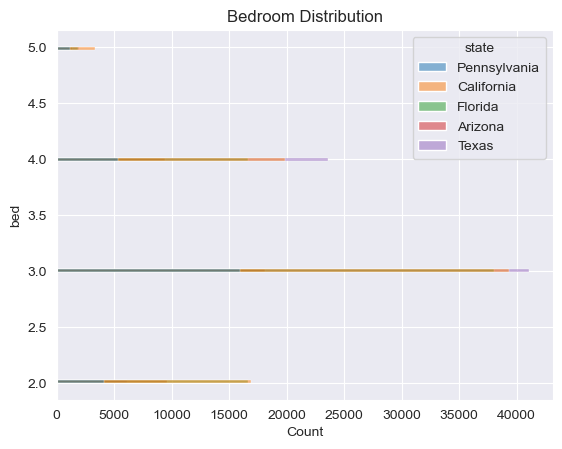

In [48]:
sns.set_style('darkgrid')
sns.histplot(y = 'bed', data = data, hue ='state')
plt.title('Bedroom Distribution')
plt.show()

#### Insights
- Most houses has 3 bedrooms

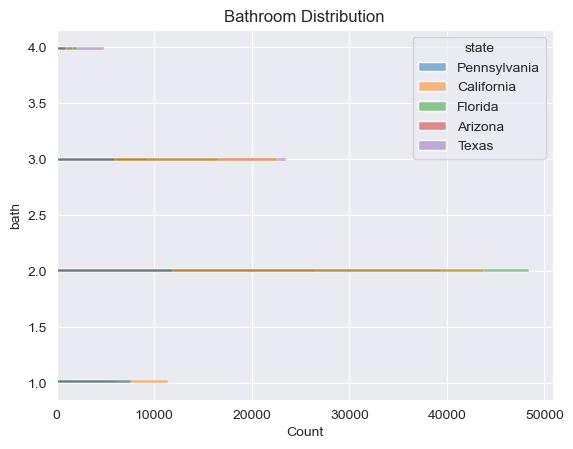

In [49]:
sns.set_style('darkgrid')
sns.histplot(y = 'bath', data = data, hue ='state')
plt.title('Bathroom Distribution')
plt.show()

### Insights
- Most houses has 2 bathrooms.
- 

#### Checking City Distribution

In [50]:
data.city.value_counts().head(20).index

Index(['Houston', 'Tucson', 'Phoenix', 'Philadelphia', 'Fort Worth',
       'Sacramento', 'Orlando', 'Dallas', 'Tampa', 'El Paso', 'San Antonio',
       'Mesa', 'Kissimmee', 'Pittsburgh', 'Katy', 'Cape Coral', 'Stockton',
       'Saint Petersburg', 'Ocala', 'Miami'],
      dtype='object', name='city')

> These are the top 20 most popular cities

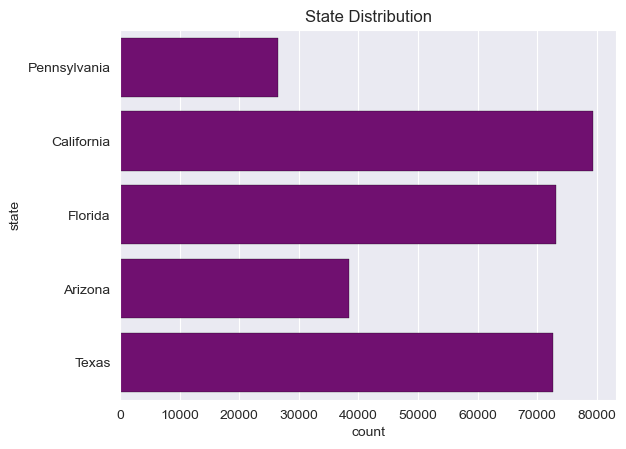

In [51]:
sns.set_style('darkgrid')
sns.countplot(y = 'state', data =data, color = 'purple',edgecolor = 'black', linewidth = 0.2)
plt.title('State Distribution')
plt.show()

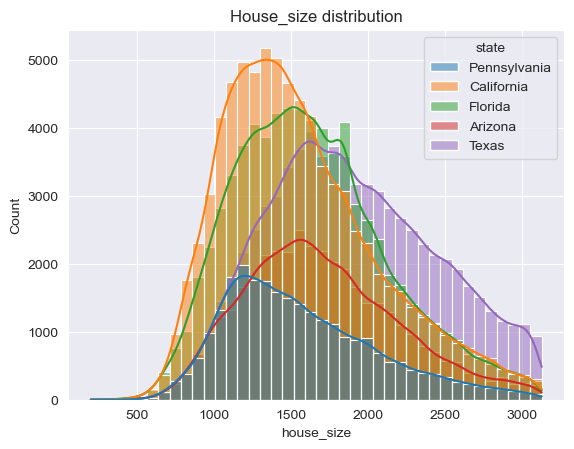

In [52]:
sns.set_style('darkgrid')
sns.histplot(x = 'house_size', data = data, hue = 'state', bins =40, kde = True)
plt.title('House_size distribution')
plt.show()

### Insights
1. Most house sizes in California are within the range of 1200 square feet to 1500 square feet.
2. Most house sizes in Texas are within the range of 1500 sqt to 2000 sqt.
3. In Pennsylvania, most house sizes are in the range of 1000 and 1500 sqt.
4. In Arizona, most house sizes are within the range of 1500 and 1700 sqt.
5. In Florida, most house sizes are 

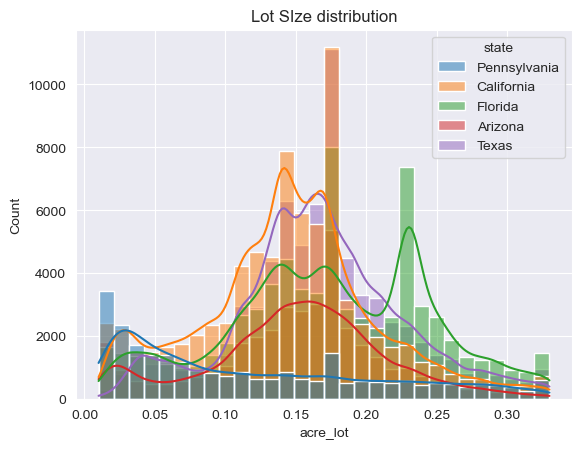

In [53]:
sns.set_style('darkgrid')
sns.histplot(x = 'acre_lot', data = data, hue = 'state', bins =30, kde = True)
plt.title('Lot SIze distribution')
plt.show()

### Insights 
1. Land sizes in california are mostly within the range of 0.15 and 0.17 acres.
2. Land sizes in florida are mostly around 0.23 acres.
3. Land sizes in arizona are mostly around 0.15 acres.
4. Land sizes in Texas are mostly around 0.16 acres.
5. Land sizes in pennsylvania are mostly around 0.01 acres.

In [54]:
data.describe()

,Unnamed: 0,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,290119.000000,290119.000000,290119.000000,290119.000000,290119.000000,290119.000000,2.901190e+05,290119.000000,290119.000000
mean,231015.297226,53973.361114,410749.462827,3.140194,2.227238,0.156424,9.340020e+05,66242.953836,1685.178651
std,131963.593693,30363.419830,194443.313924,0.744079,0.683934,0.070145,5.258243e+05,27651.040868,531.574320
min,2.000000,4.000000,1.000000,2.000000,1.000000,0.010000,6.085000e+03,15001.000000,198.000000
25%,114032.000000,26008.000000,265998.000000,3.000000,2.000000,0.110000,4.749705e+05,33844.000000,1282.000000
50%,237511.000000,53016.000000,375000.000000,3.000000,2.000000,0.160000,9.308570e+05,77377.000000,1614.000000
75%,337453.500000,79303.000000,529000.000000,4.000000,3.000000,0.200000,1.391680e+06,91304.000000,2022.000000
max,464272.000000,110142.000000,923000.000000,5.000000,4.000000,0.330000,2.001125e+06,96161.000000,3131.000000


In [55]:
data = data[data.house_size >300]

In [56]:
data = data[data.price > 10000 ]

In [57]:
data = data[data.acre_lot > 0.01]

In [58]:
data.shape

(287870, 13)

### Feature Engineering

In [59]:
data['year_sold'] = data['prev_sold_date'].str.split('-').str.get(0)

month_dict = {'01': 'January','02':'February','03':'March','04':'April', '05':'May','06':'June','07':'July',
             '08':'August', '09': 'September', '10': 'October', '11': 'November', '12':'December'}

data['month_sold'] = data['prev_sold_date'].str.split('-').str.get(1).map(month_dict)

data['prev_sold_date'] = pd.to_datetime(data.prev_sold_date).dt.date

In [60]:
data.isnull().sum()

Unnamed: 0        0
brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
year_sold         0
month_sold        0
dtype: int64

In [61]:
data.head(5)

,Unnamed: 0,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,year_sold,month_sold
0,3307,31684.0,for_sale,250000.0,3.0,2.0,0.02,295324.0,Philadelphia,Pennsylvania,19143.0,1086.0,1956-10-25,1956,October
1,9985,88745.0,for_sale,159900.0,3.0,2.0,0.08,312812.0,Palmyra,Pennsylvania,17078.0,1424.0,1959-01-16,1959,January
2,169855,56941.0,for_sale,595000.0,4.0,2.0,0.14,1227344.0,Salinas,California,93906.0,1192.0,1961-09-26,1961,September
3,7412,45827.0,for_sale,195000.0,4.0,3.0,0.14,1015944.0,Pittsburgh,Pennsylvania,15210.0,2030.0,1962-03-30,1962,March
4,169677,104223.0,for_sale,649000.0,4.0,2.0,0.18,380186.0,Salinas,California,93906.0,1240.0,1962-07-03,1962,July


### Exhaustive Analysis

In [62]:
data.brokered_by.nunique()

29659

In [63]:
data.groupby('brokered_by')['price'].mean().reset_index(name = 'avg').sort_values('avg', ascending = False).head(5)

,brokered_by,avg
26736,99138.0,921300.0
13087,49092.0,920000.0
26790,99307.0,920000.0
17492,66436.0,920000.0
8828,33338.0,920000.0


In [64]:
data.head(2)

,Unnamed: 0,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,year_sold,month_sold
0,3307,31684.0,for_sale,250000.0,3.0,2.0,0.02,295324.0,Philadelphia,Pennsylvania,19143.0,1086.0,1956-10-25,1956,October
1,9985,88745.0,for_sale,159900.0,3.0,2.0,0.08,312812.0,Palmyra,Pennsylvania,17078.0,1424.0,1959-01-16,1959,January


### Analysis on House Status

In [65]:
data.groupby('status')['price'].mean().reset_index()

,status,price
0,for_sale,413781.979474
1,sold,409952.283585


In [66]:
forsale = data[data.status == 'for_sale']

In [67]:
sold = data[data.status == 'sold']

In [68]:
forsale.shape

(111320, 15)

In [69]:
forsale.head(2)

,Unnamed: 0,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,year_sold,month_sold
0,3307,31684.0,for_sale,250000.0,3.0,2.0,0.02,295324.0,Philadelphia,Pennsylvania,19143.0,1086.0,1956-10-25,1956,October
1,9985,88745.0,for_sale,159900.0,3.0,2.0,0.08,312812.0,Palmyra,Pennsylvania,17078.0,1424.0,1959-01-16,1959,January


In [70]:
cols = ['status','bed','bath','acre_lot','street','city','state','zip_code','house_size']

In [71]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [72]:
forsale['no_of_times_listed'] = forsale.groupby(cols)['acre_lot'].transform('count')

In [73]:
forsale.no_of_times_listed.value_counts()

no_of_times_listed
1    110869
2       448
3         3
Name: count, dtype: int64

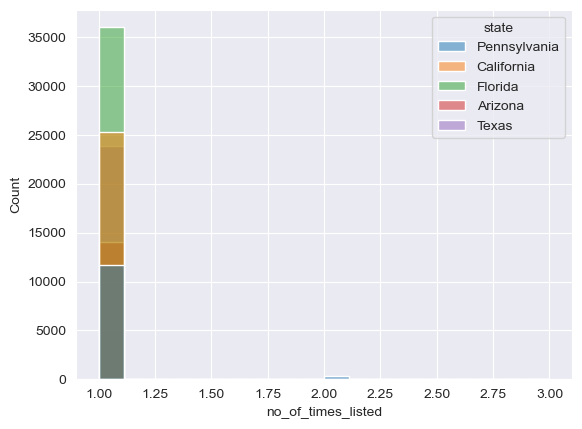

In [74]:
sns.histplot(x = forsale.no_of_times_listed, hue = 'state', data = forsale)
plt.show()

In [75]:
forsale[forsale.no_of_times_listed > 2].sort_values('brokered_by', ascending = True)

,Unnamed: 0,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,year_sold,month_sold,no_of_times_listed
3196,3216,83377.0,for_sale,89000.0,3.0,1.0,0.06,44584.0,Darby,Pennsylvania,19023.0,1232.0,1988-08-11,1988,August,3
3198,18693,83377.0,for_sale,83000.0,3.0,1.0,0.06,44584.0,Darby,Pennsylvania,19023.0,1232.0,1988-08-11,1988,August,3
3199,19423,83377.0,for_sale,78000.0,3.0,1.0,0.06,44584.0,Darby,Pennsylvania,19023.0,1232.0,1988-08-11,1988,August,3


In [76]:
listed_twice = forsale[forsale.no_of_times_listed == 2].sort_values('brokered_by', ascending = True)

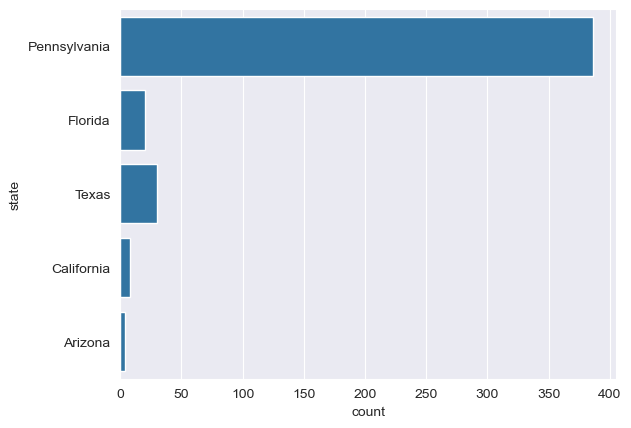

In [77]:
sns.countplot(listed_twice.state)
plt.show()

In [78]:
from functools import reduce

In [79]:
bool_list = []

In [80]:
def func(arg):
    reduce(lambda x, y: bool_list.append(True) if x > y else bool_list.append(False), arg)

In [81]:
listed_twice.groupby(cols)['price'].transform(func)

87708    NaN
87689    NaN
54823    NaN
54831    NaN
77590    NaN
          ..
225408   NaN
65378    NaN
403      NaN
66278    NaN
66294    NaN
Name: price, Length: 448, dtype: float64

In [82]:
pd.Series(bool_list).value_counts()

False    120
True     104
Name: count, dtype: int64

#### Analyzing Sold Houses

In [83]:
sold['no_of_times_sold'] = sold.groupby(cols)['brokered_by'].transform('count')

In [84]:
sold.no_of_times_sold.value_counts()

no_of_times_sold
1    176536
2        14
Name: count, dtype: int64

In [85]:
sold[sold.no_of_times_sold == 2].sort_values('zip_code', ascending =True)

,Unnamed: 0,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,year_sold,month_sold,no_of_times_sold
222637,190246,23087.0,sold,549900.0,2.0,2.0,0.02,1744303.0,Philadelphia,Pennsylvania,19130.0,1470.0,2022-03-16,2022,March,2
222923,209389,16829.0,sold,549900.0,2.0,2.0,0.02,1744303.0,Philadelphia,Pennsylvania,19130.0,1470.0,2022-03-16,2022,March,2
250488,208333,23087.0,sold,629000.0,3.0,2.0,0.02,632472.0,Philadelphia,Pennsylvania,19130.0,1734.0,2022-04-06,2022,April,2
251039,209532,16829.0,sold,629000.0,3.0,2.0,0.02,632472.0,Philadelphia,Pennsylvania,19130.0,1734.0,2022-04-06,2022,April,2
204731,209520,16829.0,sold,159900.0,3.0,1.0,0.02,448300.0,Philadelphia,Pennsylvania,19145.0,1030.0,2022-03-01,2022,March,2
204753,189921,23087.0,sold,159900.0,3.0,1.0,0.02,448300.0,Philadelphia,Pennsylvania,19145.0,1030.0,2022-03-01,2022,March,2
269055,258359,38891.0,sold,259900.0,3.0,2.0,0.24,662730.0,Ocala,Florida,34472.0,1559.0,2022-04-19,2022,April,2
278929,212372,38891.0,sold,259900.0,3.0,2.0,0.24,662730.0,Ocala,Florida,34472.0,1559.0,2022-04-25,2022,April,2
124164,272533,97820.0,sold,165000.0,3.0,2.0,0.14,61390.0,Dallas,Texas,75217.0,1319.0,2021-11-30,2021,November,2
205055,274251,102604.0,sold,239990.0,3.0,2.0,0.14,61390.0,Dallas,Texas,75217.0,1319.0,2022-03-01,2022,March,2


In [102]:
data['forsale/sold'] = data.groupby(['bed','bath','acre_lot','street','city','state','zip_code','house_size'])['status'].transform(lambda x: ",".join(x.unique()))

In [103]:
data['forsale/sold'].value_counts()

forsale/sold
sold             154100
for_sale          88870
for_sale,sold     44376
sold,for_sale       524
Name: count, dtype: int64

In [104]:
data[['bed','bath','acre_lot','street','city','state','zip_code','house_size']].duplicated().sum()

22680

In [105]:
re_sold = data[(data['forsale/sold'] =='for_sale,sold')|(data['forsale/sold'] == 'sold,for_sale')].sort_values('house_size').drop_duplicates()

In [106]:
re_sold.state.value_counts()

state
California      12878
Florida         10941
Texas            9908
Arizona          8465
Pennsylvania     2708
Name: count, dtype: int64

### Conducting Analysis Based On States

In [107]:
avg_price = data.groupby('state')['price'].mean().reset_index()

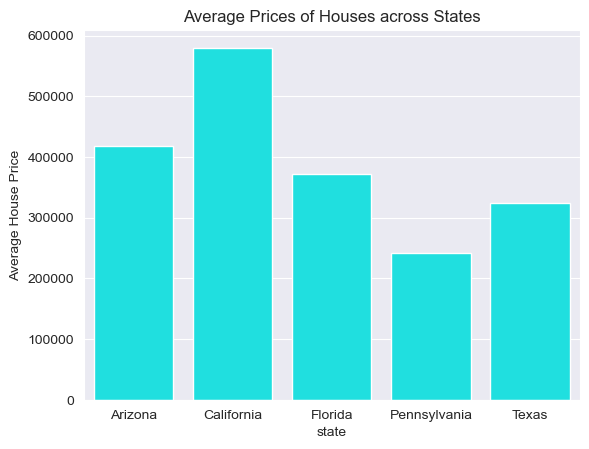

In [108]:
sns.set_style('darkgrid')
sns.barplot(x = 'state', y = 'price', data = avg_price, color ='cyan')
plt.title('Average Prices of Houses across States')
plt.ylabel('Average House Price')
plt.show()

In [109]:
data.groupby('state')['price'].std()

state
Arizona         151523.183759
California      182797.016736
Florida         161645.322468
Pennsylvania    135342.825036
Texas           135992.645107
Name: price, dtype: float64

In [110]:
city_dict = {}
for x in data.state.unique():
    length = data[data.state ==x]['city'].nunique()
    city_dict.update({x:length})

In [111]:
pd.DataFrame(city_dict, index = ['Number of cities'])

,Pennsylvania,California,Florida,Arizona,Texas
Number of cities,985,914,526,158,828


### Analysis on Houses in California

In [112]:
california = data[data.state == 'California']

In [113]:
california.head(2)

,Unnamed: 0,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,year_sold,month_sold,forsale/sold
2,169855,56941.0,for_sale,595000.0,4.0,2.0,0.14,1227344.0,Salinas,California,93906.0,1192.0,1961-09-26,1961,September,for_sale
4,169677,104223.0,for_sale,649000.0,4.0,2.0,0.18,380186.0,Salinas,California,93906.0,1240.0,1962-07-03,1962,July,for_sale


In [114]:
california.shape

(78886, 16)

<Axes: ylabel='price'>

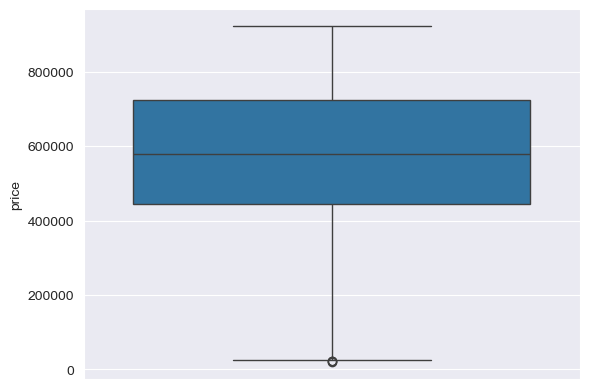

In [115]:
sns.boxplot(california.price)

In [117]:
city_dict = california.city.value_counts().head(20).to_dict()

In [118]:
california['city_freq'] = california.city.map(city_dict)

In [119]:
sample_california = california.dropna()

In [120]:
sample_california.sample(5)

,Unnamed: 0,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,year_sold,month_sold,forsale/sold,city_freq
966,140637,78364.0,for_sale,579000.0,2.0,1.0,0.06,382795.0,Long Beach,California,90804.0,668.0,1979-05-10,1979,May,for_sale,687.0
248881,417534,109042.0,sold,409000.0,4.0,3.0,0.15,1763501.0,Bakersfield,California,93311.0,2122.0,2022-04-05,2022,April,sold,1139.0
159937,447817,98963.0,sold,538500.0,3.0,3.0,0.33,139693.0,Modesto,California,95351.0,2345.0,2022-01-13,2022,January,sold,1289.0
82873,152645,35346.0,for_sale,389000.0,2.0,2.0,0.03,839634.0,Murrieta,California,92563.0,1031.0,2019-10-15,2019,October,for_sale,858.0
287835,407270,65047.0,sold,540000.0,4.0,2.0,0.17,744771.0,Moreno Valley,California,92553.0,1295.0,2022-04-30,2022,April,"for_sale,sold",886.0


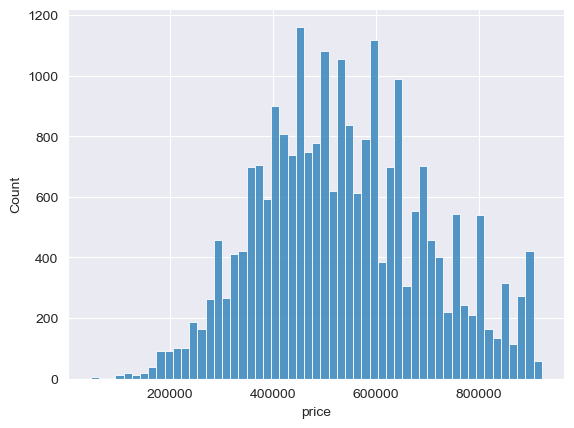

In [121]:
sns.histplot(x = 'price', data = sample_california)
plt.show()

In [122]:
sample_california.year_sold.value_counts().reset_index().head(5)

,year_sold,count
0,2022,12282
1,2021,5412
2,2019,436
3,2017,421
4,2018,414


In [123]:
sample_california.city.unique()

array(['Los Angeles', 'Long Beach', 'Roseville', 'San Diego',
       'Bakersfield', 'Sacramento', 'Fresno', 'Fontana', 'San Bernardino',
       'Oakland', 'Victorville', 'Elk Grove', 'Modesto', 'Stockton',
       'Riverside', 'Moreno Valley', 'Corona', 'Murrieta', 'Menifee',
       'Temecula'], dtype=object)

In [124]:
sample_california[sample_california.year_sold.astype(int) >= 2010].groupby('year_sold')['price'].mean().sort_values(ascending = False).reset_index().head(5)

,year_sold,price
0,2020,560224.094340
1,2015,557025.938776
2,2016,548429.254658
3,2019,548072.534404
4,2018,546893.057971


In [125]:
month = sample_california.month_sold.value_counts().reset_index(name = 'count')

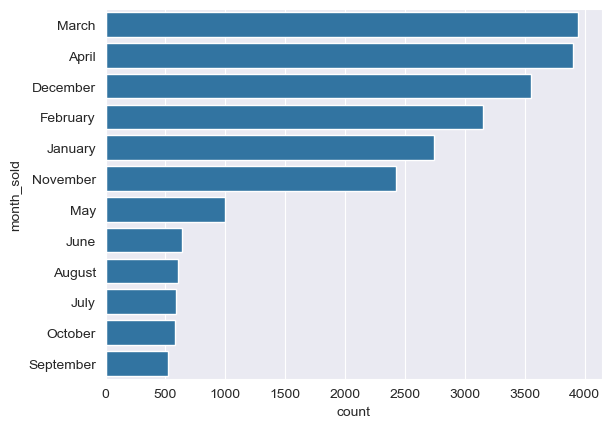

In [126]:
sns.barplot( y = 'month_sold', x = 'count', data = month)
plt.show()

In [127]:
pd.concat([sample_california.groupby(['bed','bath']).size().reset_index(name = 'count'), sample_california.groupby(['bed','bath'])['price'].mean().reset_index().drop(columns = ['bed','bath']),], axis =1).sort_values('price', ascending = False)

,bed,bath,count,price
12,5.0,1.0,1,899000.000000
7,3.0,4.0,69,687314.623188
11,4.0,4.0,263,675626.965779
15,5.0,4.0,203,670853.694581
14,5.0,3.0,941,655622.849097
10,4.0,3.0,3544,626625.947235
3,2.0,4.0,7,621428.571429
2,2.0,3.0,210,598247.961905
6,3.0,3.0,2528,576507.045491
13,5.0,2.0,164,575864.682927


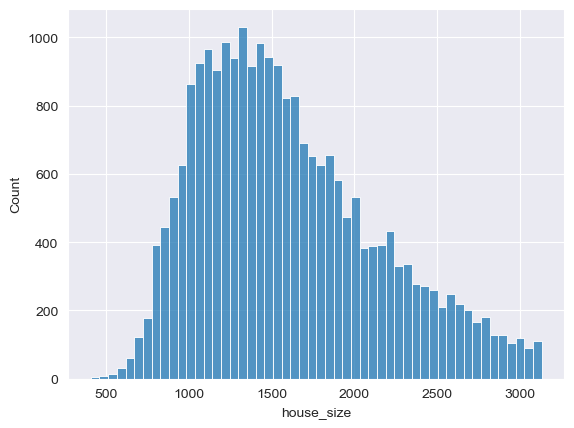

In [128]:
sns.histplot(sample_california.house_size)
plt.show()

In [129]:
sample_california.groupby('house_size')['price'].mean().sort_values(ascending = False).reset_index().head(5)

,house_size,price
0,2949.0,919000.0
1,3022.0,900000.0
2,3084.0,899000.0
3,2970.0,895000.0
4,3083.0,880000.0


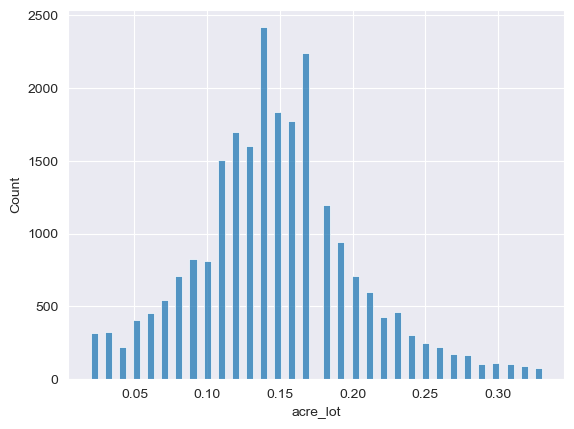

In [130]:
sns.histplot(sample_california.acre_lot)
plt.show()

In [131]:
sample_california.groupby('acre_lot')['price'].mean().sort_values(ascending = False).reset_index().head(7)

,acre_lot,price
0,0.32,618899.076923
1,0.31,592230.077670
2,0.27,589541.636364
3,0.28,587912.783133
4,0.33,578827.717949
5,0.30,578352.321101
6,0.26,573952.366516


In [132]:
cities = sample_california.groupby('city')['price'].mean().sort_values(ascending = False).reset_index()

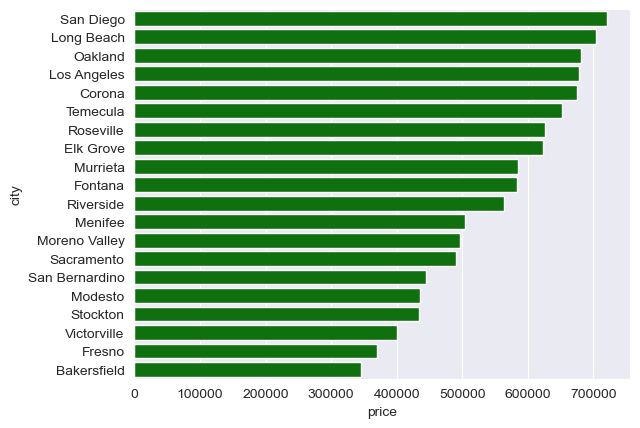

In [133]:
sns.barplot(y = 'city', x ='price', data = cities, color = 'green')
plt.show()

In [134]:
sample_california.city.value_counts()

city
Sacramento        4358
Stockton          1726
Los Angeles       1653
Modesto           1289
Riverside         1221
San Diego         1170
Bakersfield       1139
Oakland           1122
San Bernardino    1011
Roseville          966
Menifee            946
Moreno Valley      886
Elk Grove          862
Murrieta           858
Fontana            831
Victorville        775
Fresno             731
Temecula           713
Corona             694
Long Beach         687
Name: count, dtype: int64

In [135]:
sample = sample_california [sample_california.city == 'Long Beach']
for var in list(sample_california.city.unique()):
    if var == 'Long Beach':
        continue
    samp = sample_california[sample_california.city == var].sample(n = 687)
    sample = pd.concat([samp,sample])

In [136]:
sample.groupby('city')['price'].mean().sort_values(ascending = False).head(20).reset_index()

,city,price
0,San Diego,718761.890830
1,Long Beach,704329.746725
2,Los Angeles,682193.914119
3,Oakland,678285.494905
4,Corona,676710.989811
5,Temecula,654150.633188
6,Roseville,626377.598253
7,Elk Grove,622813.631732
8,Murrieta,586812.671033
9,Fontana,586654.024745


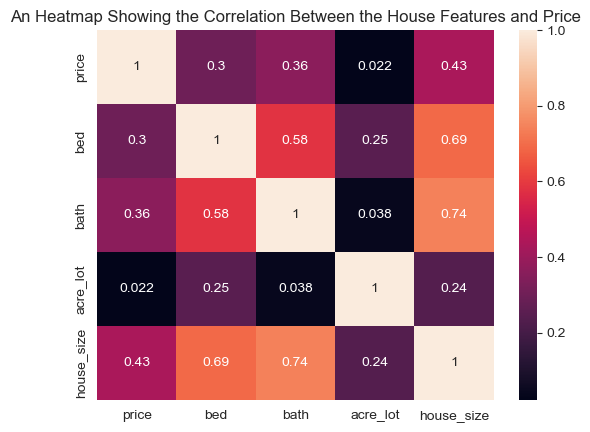

In [137]:
sns.heatmap(sample_california[['price','bed','bath','acre_lot','house_size']].corr(numeric_only = True, method ='spearman'), annot = True)
plt.title('An Heatmap Showing the Correlation Between the House Features and Price')
plt.show()

In [138]:
sample_california.shape

(23638, 17)

##### __Analyzing Zip Codes__

In [139]:
dictionary = {}
for city in sample_california.city.unique():
    cal_zipcodes = sample_california.groupby('city')['zip_code'].unique()
    dictionary.update({city: list(cal_zipcodes.loc[city])})

In [140]:
dictionary['Roseville']

[95661.0, 95678.0, 95747.0]

### Analysis on Houses in Arizona

In [141]:
arizona = data[data.state == 'Arizona']

In [142]:
arizona.shape

(37775, 16)

In [143]:
arizona.head(3)

,Unnamed: 0,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,year_sold,month_sold,forsale/sold
159,130755,51755.0,for_sale,365000.0,3.0,2.0,0.19,1721857.0,Tucson,Arizona,85710.0,1470.0,1970-10-01,1970,October,for_sale
194,130666,33714.0,for_sale,325000.0,3.0,2.0,0.24,863585.0,Tucson,Arizona,85730.0,2092.0,1971-07-15,1971,July,for_sale
196,129537,100423.0,for_sale,650000.0,4.0,2.0,0.23,1261102.0,Tucson,Arizona,85701.0,2075.0,1971-08-01,1971,August,for_sale


In [144]:
ari_city_dict = arizona.city.value_counts().head(20).to_dict()

In [145]:
arizona['city_freq'] = arizona['city'].map(ari_city_dict)

In [146]:
sample_arizona = arizona.dropna()

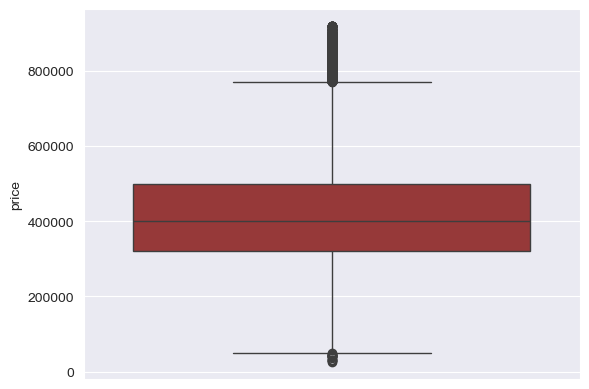

In [147]:
sns.boxplot(sample_arizona.price, color ='brown')
plt.show()

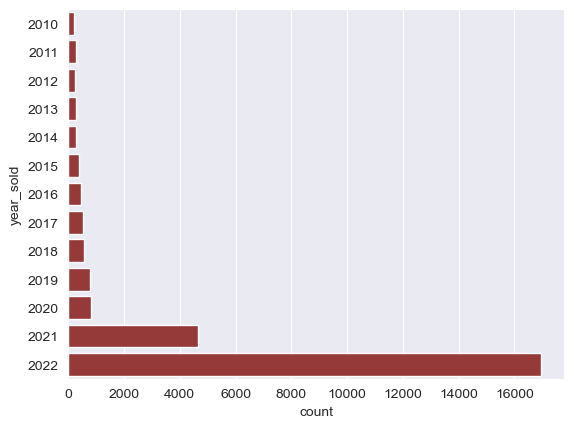

In [148]:
sns.countplot(sample_arizona[sample_arizona['year_sold'].astype(int)>=2010].year_sold, color = 'brown')
plt.show()

In [149]:
sample_arizona.groupby(['bed','bath']).size().sort_values(ascending = False).reset_index().head(5)

,bed,bath,0
0,3.0,2.0,10859
1,2.0,2.0,5219
2,4.0,2.0,3896
3,4.0,3.0,3123
4,3.0,3.0,2642


In [150]:
pd.concat([sample_arizona.groupby(['bed','bath']).size().reset_index(), sample_arizona.groupby(['bed','bath'])['price'].mean().reset_index().drop(columns = ['bed','bath'])], axis =1).sort_values('price', ascending = False).head(5)

,bed,bath,0,price
11,4.0,4.0,229,601928.296943
7,3.0,4.0,83,594504.518072
15,5.0,4.0,111,567221.765766
14,5.0,3.0,733,529873.540246
10,4.0,3.0,3123,524093.359590


In [151]:
sample_arizona.shape

(29157, 17)

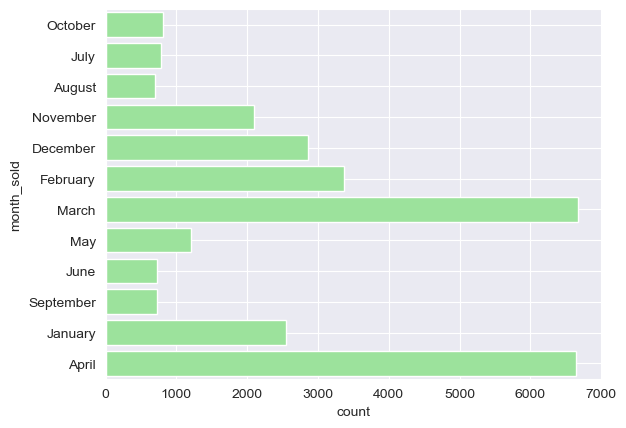

In [152]:
sns.countplot(sample_arizona.month_sold, color = 'lightgreen')
plt.grid(True)
plt.show()

In [153]:
arizona_monthly_sales = sample_arizona.groupby('month_sold')['price'].mean().reset_index()

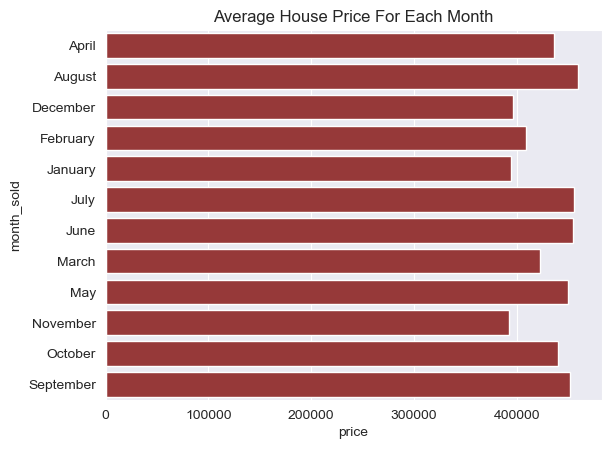

In [154]:
sns.set_style('darkgrid')
sns.barplot(x = 'price', y ='month_sold', data = arizona_monthly_sales, color = 'brown')
plt.title('Average House Price For Each Month')
plt.show()

In [155]:
sample_arizona.groupby('month_sold')['price'].mean().sort_values(ascending = False).reset_index()

,month_sold,price
0,August,459556.680973
1,July,456201.613027
2,June,454581.372951
3,September,451808.199181
4,May,449438.177100
5,October,440612.072750
6,April,436262.857293
7,March,422735.878129
8,February,409259.397150
9,December,396217.379419


In [156]:
sample_arizona.groupby('house_size')['price'].mean().sort_values(ascending = False).reset_index().head(5)

,house_size,price
0,2749.0,920000.0
1,3032.0,898500.0
2,2841.0,895000.0
3,2814.0,875000.0
4,3128.0,875000.0


In [157]:
sample_arizona.year_sold.value_counts().head(10).reset_index().sort_values('count', ascending = False)

,year_sold,count
0,2022,16942
1,2021,4645
2,2020,830
3,2019,768
4,2018,580
5,2017,527
6,2016,464
7,2015,382
8,2014,287
9,2005,280


In [158]:
ari_cities = sample_arizona.groupby('city')['price'].mean().sort_values(ascending = False).reset_index()

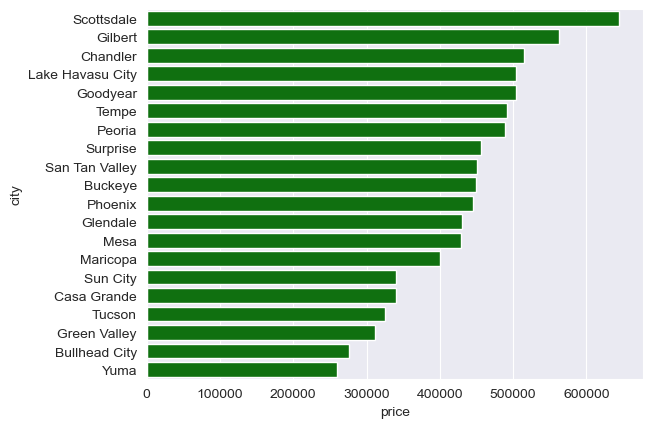

In [159]:
sns.barplot(x ='price',  y = 'city', data = ari_cities, color ='green')
plt.show()

In [160]:
sample_arizona.groupby('acre_lot')['price'].mean().sort_values(ascending = False).reset_index().head(7)

,acre_lot,price
0,0.33,531211.604651
1,0.31,527764.386792
2,0.27,515982.780822
3,0.24,513016.033663
4,0.30,509151.376812
5,0.25,507163.352436
6,0.26,506867.233038


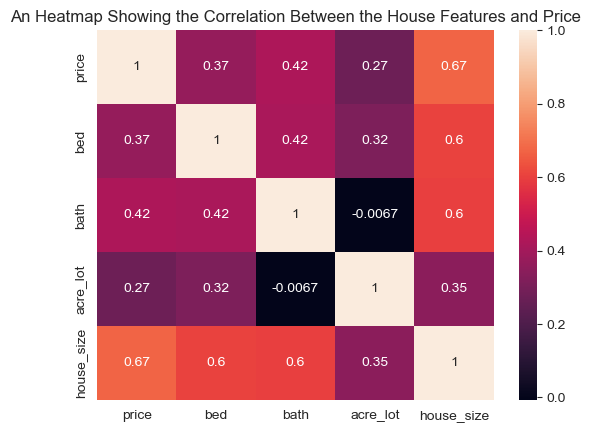

In [161]:
sns.heatmap(sample_arizona[['price','bed','bath','acre_lot','house_size']].corr(numeric_only = True, method ='spearman'), annot = True)
plt.title('An Heatmap Showing the Correlation Between the House Features and Price')
plt.show()

In [162]:
ari_dictionary = {}
for city in sample_arizona.city.unique():
    ari_zipcodes = sample_arizona.groupby('city')['zip_code'].unique()
    ari_dictionary.update({city: list(ari_zipcodes.loc[city])})

In [163]:
ari_dictionary['Scottsdale']

[85251.0,
 85257.0,
 85254.0,
 85258.0,
 85259.0,
 85260.0,
 85250.0,
 85255.0,
 85266.0,
 85262.0,
 85054.0]

### Analysis on Houses in Florida

In [164]:
florida = data[data.state == 'Florida']

In [165]:
florida.nunique()

Unnamed: 0        72691
brokered_by        8940
status                2
price              5843
bed                   4
bath                  4
acre_lot             32
street            67181
city                526
state                 1
zip_code            871
house_size         2529
prev_sold_date     7380
year_sold            60
month_sold           12
forsale/sold          4
dtype: int64

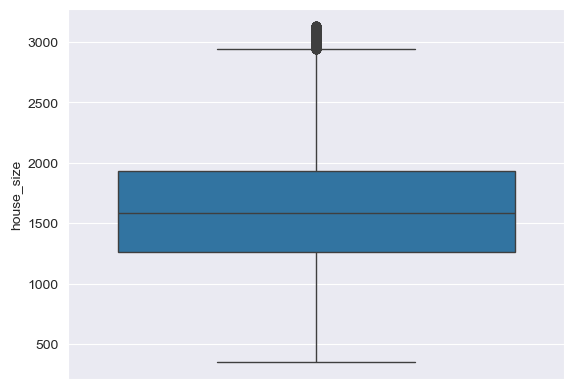

In [166]:
sns.boxplot(florida.house_size)
plt.show()

In [167]:
flo_city_dict = florida.city.value_counts().head(20).to_dict()

In [168]:
florida['city_freq'] = florida['city'].map(flo_city_dict)

In [169]:
sample_florida = florida.dropna()

In [170]:
sample_florida.shape

(30312, 17)

In [171]:
sample_florida.city.unique()

array(['Melbourne', 'Orlando', 'Jacksonville', 'Palm Bay', 'Fort Myers',
       'Port Saint Lucie', 'Cape Coral', 'Lehigh Acres', 'Kissimmee',
       'Springhill', 'Saint Petersburg', 'Miami', 'North Port', 'Tampa',
       'Port Charlotte', 'Ocala', 'Lakeland', 'Davenport', 'Pensacola',
       'Riverview'], dtype=object)

In [172]:
florida_cities = sample_florida.groupby('city')['price'].mean().sort_values(ascending = False).reset_index()

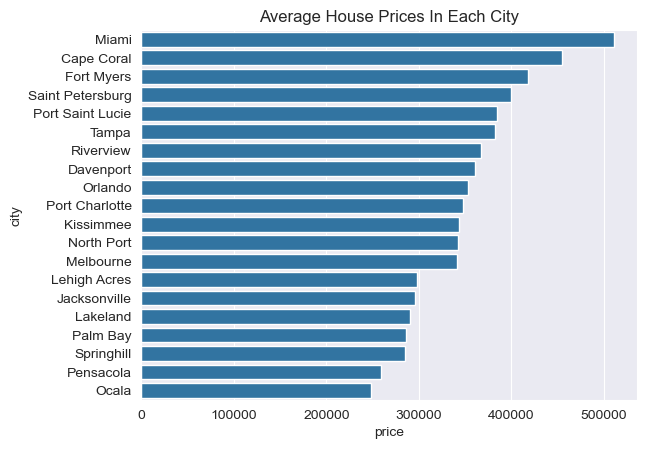

In [173]:
sns.barplot(x = 'price', y = 'city',data = florida_cities)
plt.title('Average House Prices In Each City')
plt.show()

In [174]:
sample_florida.groupby(['bed','bath']).size().sort_values(ascending = False).reset_index().head(5)

,bed,bath,0
0,3.0,2.0,12509
1,4.0,2.0,3760
2,2.0,2.0,3396
3,4.0,3.0,3133
4,3.0,3.0,2732


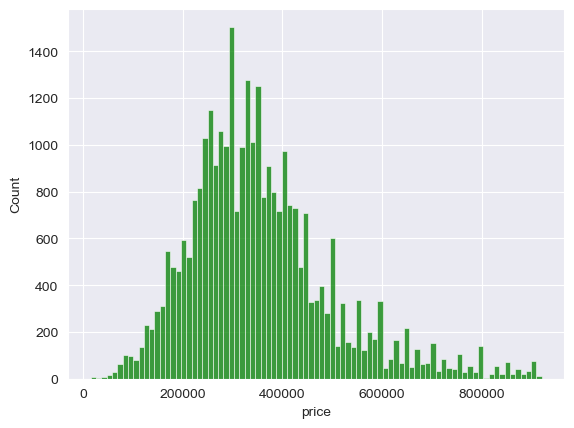

In [175]:
sns.histplot(x ='price', color = 'green', data = sample_florida)
plt.show()

In [176]:
pd.concat([sample_florida.groupby(['bed','bath']).size().reset_index(name = 'count'), sample_florida.groupby(['bed','bath'])['price'].mean().reset_index().drop(columns = ['bed','bath']),], axis =1).sort_values('price', ascending = False).head(5)

,bed,bath,count,price
11,4.0,4.0,476,531958.231092
7,3.0,4.0,227,531484.356828
15,5.0,4.0,230,516431.956522
14,5.0,3.0,483,480052.115942
10,4.0,3.0,3133,472253.657517


In [177]:
sample_florida.groupby('house_size')['price'].mean().sort_values(ascending = False).reset_index().head(5)

,house_size,price
0,2676.0,900000.0
1,2353.0,899999.0
2,3116.0,899000.0
3,3035.0,895000.0
4,2817.0,895000.0


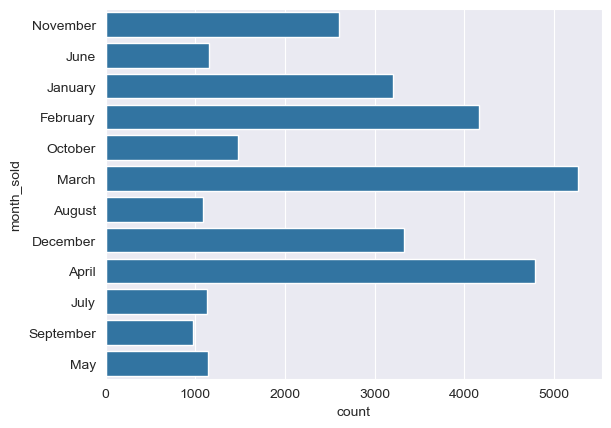

In [178]:
sns.countplot(sample_florida.month_sold)
plt.show()

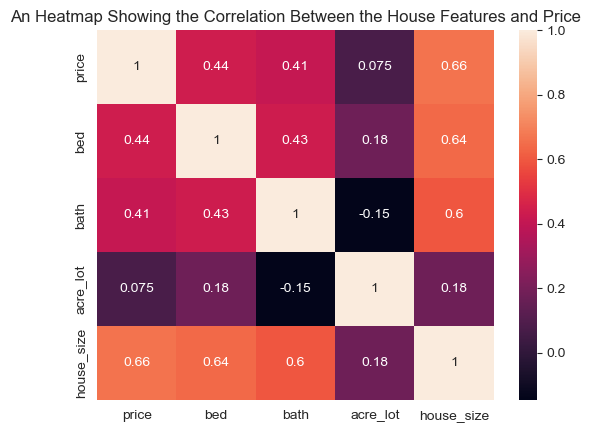

In [179]:
sns.heatmap(sample_florida[['price','bed','bath','acre_lot','house_size']].corr(numeric_only = True, method ='spearman'), annot = True)
plt.title('An Heatmap Showing the Correlation Between the House Features and Price')
plt.show()

In [180]:
sample_florida.shape

(30312, 17)

### Analysis on Houses in Texas

In [181]:
texas = data[data.state == 'Texas']

In [182]:
texas.shape

(72605, 16)

In [183]:
tex_cities_dict = texas.city.value_counts().head(20).to_dict()

In [186]:
texas['city_freq'] = texas.city.map(tex_cities_dict)

In [187]:
sample_texas = texas.dropna()

In [188]:
sample_texas.shape

(40105, 17)

In [189]:
%matplotlib inline

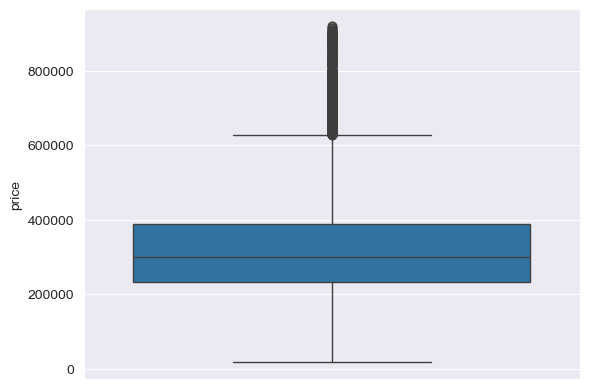

In [190]:
sns.boxplot(sample_texas.price)
plt.show()

In [191]:
sample_texas.groupby(['bed','bath']).size().sort_values(ascending = False).reset_index().head(5)

,bed,bath,0
0,3.0,2.0,14238
1,4.0,3.0,6966
2,3.0,3.0,5547
3,4.0,2.0,4585
4,3.0,4.0,1532


In [192]:
pd.concat([sample_texas.groupby(['bed','bath']).size().reset_index(name ='count'), sample_texas.groupby(['bed','bath'])['price'].mean().reset_index().drop(columns = ['bed','bath'])],axis = 1).sort_values('price', ascending = False).head(4)

,bed,bath,count,price
7,3.0,4.0,1532,493175.917755
3,2.0,4.0,31,469108.516129
11,4.0,4.0,1282,462718.731669
15,5.0,4.0,265,413192.966038


In [193]:
monthly_sales = sample_texas.groupby('month_sold')['price'].mean().sort_values(ascending = False).round().reset_index()

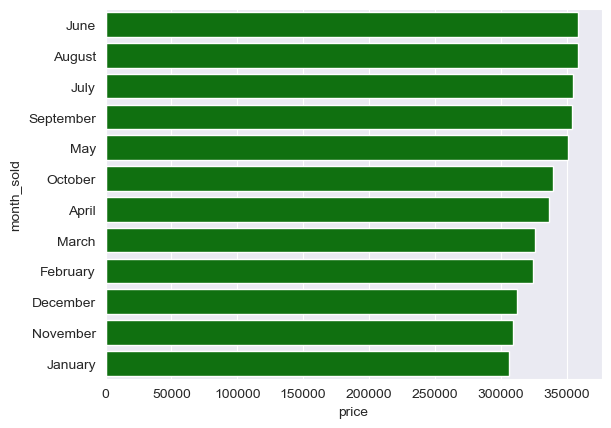

In [194]:
sns.barplot(x = 'price', y ='month_sold', data = monthly_sales, color = 'green')
plt.show()

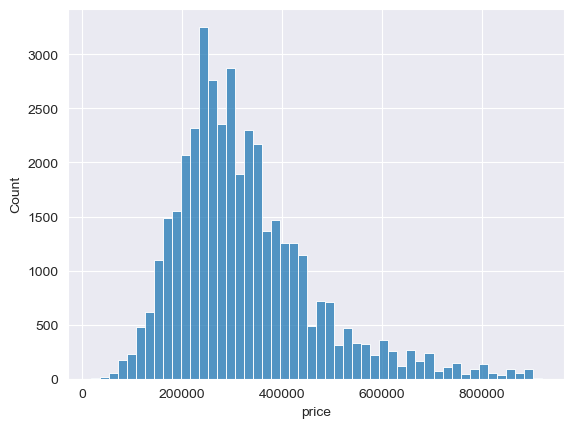

In [195]:
sns.histplot(sample_texas.price, bins = 50)
plt.show()

In [196]:
city_avg = sample_texas.groupby('city')['price'].mean().round().sort_values(ascending = False).reset_index()

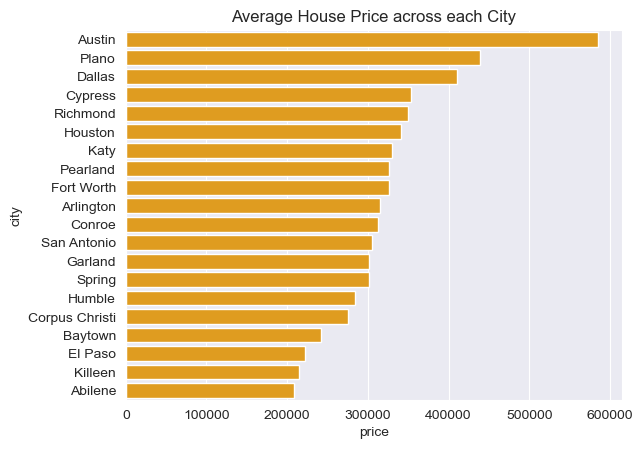

In [197]:
sns.barplot(x = 'price', y ='city', data = city_avg, color = 'orange')
plt.title('Average House Price across each City')
plt.show()

In [198]:
sample_texas.groupby('acre_lot')['price'].mean().sort_values(ascending = False).reset_index().head(5)

,acre_lot,price
0,0.04,400041.000806
1,0.29,387840.454874
2,0.06,382904.404378
3,0.05,381080.360190
4,0.27,374656.128280


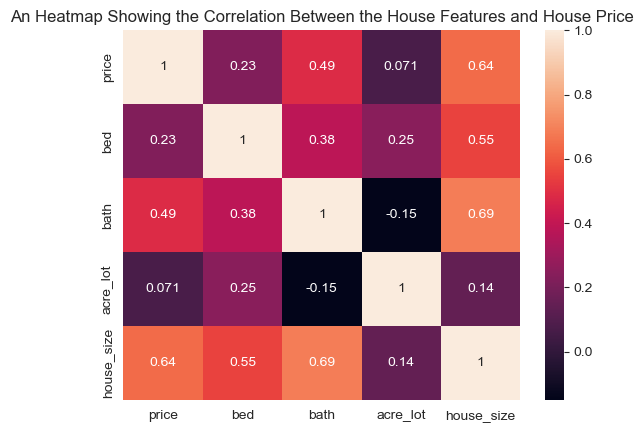

In [199]:
sns.heatmap(sample_texas[['price','bed','bath','acre_lot','house_size']].corr(numeric_only = True, method ='spearman'), annot = True)
plt.title('An Heatmap Showing the Correlation Between the House Features and House Price')
plt.show()

### Analysis on Houses in Pennsylvania

In [200]:
pennsylvania = data[data.state == 'Pennsylvania']

In [201]:
pennsylvania.shape

(25913, 16)

In [202]:
pennsylvania.describe()

,Unnamed: 0,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,25913.000000,25913.000000,25913.000000,25913.000000,25913.000000,25913.000000,2.591300e+04,25913.000000,25913.000000
mean,110923.572647,45894.865782,241348.379925,3.143789,2.013275,0.123151,9.139570e+05,17909.665072,1578.760583
std,95352.677269,28383.855781,135342.825036,0.710543,0.812297,0.090460,5.140983e+05,1461.800744,497.732096
min,2.000000,5.000000,11500.000000,2.000000,1.000000,0.020000,6.085000e+03,15001.000000,400.000000
25%,9439.000000,20269.000000,149000.000000,3.000000,1.000000,0.040000,4.811690e+05,17046.000000,1200.000000
50%,190082.000000,48532.000000,219000.000000,3.000000,2.000000,0.100000,9.290680e+05,18466.000000,1486.000000
75%,200489.000000,74476.000000,309000.000000,3.000000,3.000000,0.190000,1.360007e+06,19128.000000,1880.000000
max,262669.000000,110141.000000,915000.000000,5.000000,4.000000,0.330000,1.982920e+06,19611.000000,3131.000000


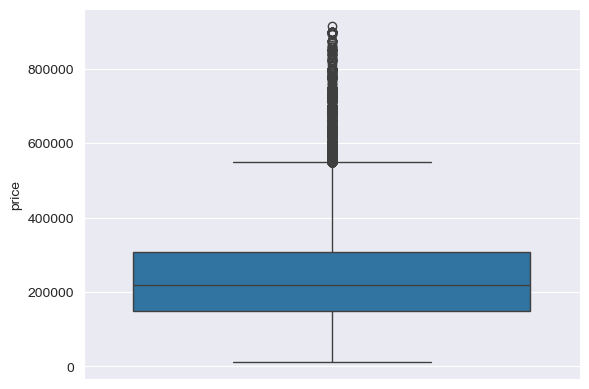

In [203]:
sns.boxplot(pennsylvania.price)
plt.show()

In [204]:
pen_city_dict = pennsylvania.city.value_counts().head(20).to_dict()

In [205]:
pennsylvania['city_freq'] = pennsylvania['city'].map(pen_city_dict)

In [206]:
sample_pennsylvania = pennsylvania.dropna()

In [207]:
sample_pennsylvania.shape

(12597, 17)

In [208]:
sample_pennsylvania.groupby(['bed','bath']).size().sort_values(ascending = False).reset_index().head(5)

,bed,bath,0
0,3.0,2.0,3427
1,3.0,1.0,2603
2,3.0,3.0,1444
3,4.0,2.0,1185
4,2.0,1.0,888


In [209]:
pd.concat([sample_pennsylvania.groupby(['bed','bath']).size().reset_index(name ='count'), sample_pennsylvania.groupby(['bed','bath'])['price'].mean().reset_index().drop(columns = ['bed','bath'])],axis = 1).sort_values('price', ascending = False).head(4)

,bed,bath,count,price
7,3.0,4.0,175,470584.582857
11,4.0,4.0,178,450860.022472
15,5.0,4.0,61,450635.901639
3,2.0,4.0,9,394700.000000


In [210]:
monthly_sale = sample_pennsylvania.groupby('month_sold')['price'].mean().sort_values(ascending = False).round().reset_index()

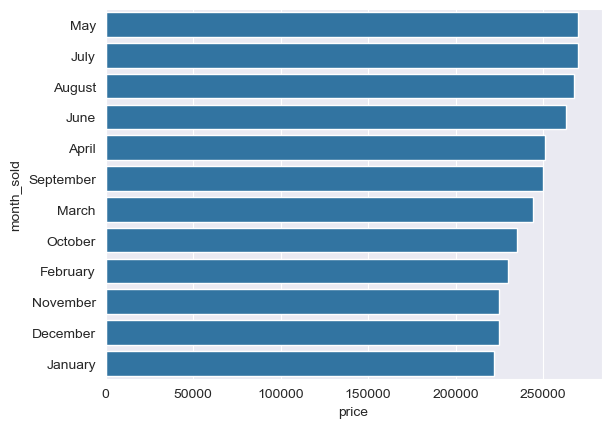

In [211]:
sns.barplot(x = 'price', y = 'month_sold', data = monthly_sale)
plt.show()

In [212]:
yearly_pattern = sample_pennsylvania.year_sold.value_counts().head(20).reset_index().sort_values('year_sold')

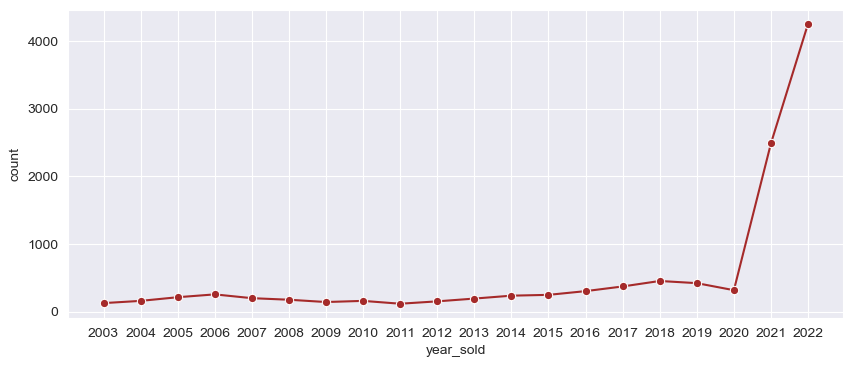

In [213]:
plt.figure (figsize = (10,4))
sns.lineplot(y= 'count', x = 'year_sold', data = yearly_pattern, marker = 'o', color = 'brown')
plt.show()

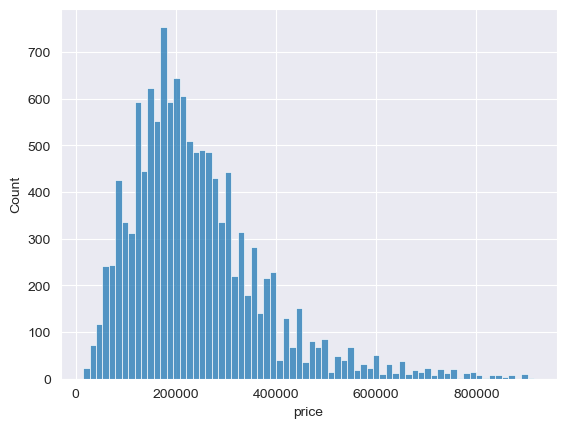

In [214]:
sns.histplot(sample_pennsylvania.price)
plt.show()

In [215]:
city_average = sample_pennsylvania.groupby('city')['price'].mean().sort_values(ascending = False).reset_index()

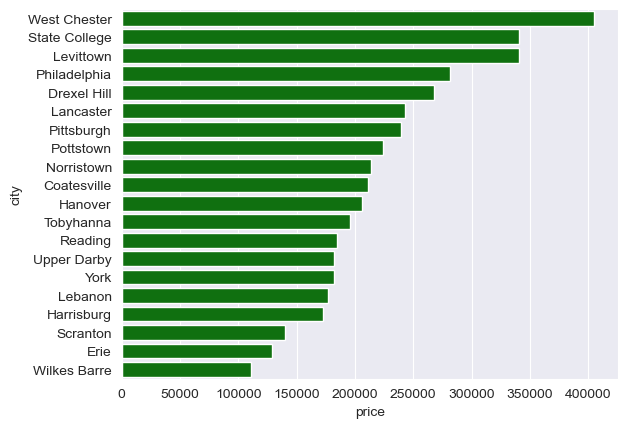

In [216]:
sns.barplot(x ='price', y ='city', data = city_average, color ='green')
plt.show()

In [217]:
sample_pennsylvania.groupby('house_size')['price'].mean().sort_values(ascending = False).reset_index().head(5)

,house_size,price
0,2791.0,900000.0
1,2497.0,875000.0
2,3030.0,865000.0
3,2873.0,829900.0
4,2918.0,825000.0


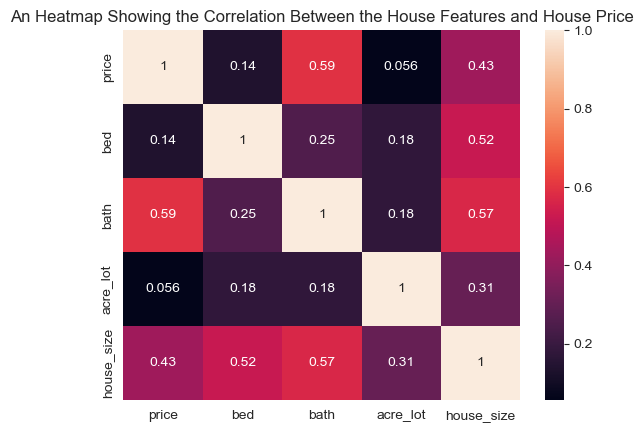

In [218]:
sns.heatmap(sample_pennsylvania[['price','bed','bath','acre_lot','house_size']].corr(numeric_only = True, method ='spearman'), annot = True)
plt.title('An Heatmap Showing the Correlation Between the House Features and House Price')
plt.show()

## __Combining the cities we would be working with.__

In [219]:
states_datasets = [sample_california, sample_arizona, sample_florida, sample_texas, sample_pennsylvania]

In [220]:
cali_shape = sample_california.shape[0]
for state in states_datasets:
    if state is sample_california:
        continue
    total_length = state.shape[0]
    cali_shape += total_length

In [221]:
print(f'The total number of rows we would be working with is {cali_shape}')

The total number of rows we would be working with is 135809


In [222]:
merged_data = pd.concat(states_datasets)

In [223]:
merged_data.nunique()

Unnamed: 0        135809
brokered_by        16333
status                 2
price               8125
bed                    4
bath                   4
acre_lot              32
street            124996
city                 100
state                  5
zip_code            1206
house_size          2563
prev_sold_date      8815
year_sold             62
month_sold            12
forsale/sold           4
city_freq             97
dtype: int64

In [224]:
merged_data.shape

(135809, 17)

In [225]:
merged_data.head(5)

,Unnamed: 0,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,year_sold,month_sold,forsale/sold,city_freq
14,135080,82036.0,for_sale,870000.0,4.0,2.0,0.16,1405290.0,Los Angeles,California,90016.0,1809.0,1964-06-04,1964,June,"for_sale,sold",1653.0
15,138547,38169.0,for_sale,524000.0,3.0,1.0,0.12,150537.0,Los Angeles,California,90059.0,1082.0,1964-06-09,1964,June,"for_sale,sold",1653.0
17,137209,17170.0,for_sale,675000.0,3.0,2.0,0.13,853644.0,Los Angeles,California,90033.0,1388.0,1964-07-23,1964,July,for_sale,1653.0
21,134432,53691.0,for_sale,450000.0,3.0,1.0,0.12,1170956.0,Los Angeles,California,90003.0,1464.0,1964-09-03,1964,September,for_sale,1653.0
27,134418,16040.0,for_sale,660000.0,4.0,3.0,0.12,1771198.0,Los Angeles,California,90001.0,1760.0,1964-12-29,1964,December,for_sale,1653.0


In [226]:
merged_data = merged_data.sample(n = merged_data.shape[0], random_state = 46).reset_index(drop = True)

In [227]:
merged_data.head(5)

,Unnamed: 0,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,year_sold,month_sold,forsale/sold,city_freq
0,2612,83377.0,for_sale,198000.0,4.0,2.0,0.04,1586992.0,Philadelphia,Pennsylvania,19142.0,1152.0,1996-02-05,1996,February,for_sale,5069.0
1,364154,28969.0,sold,849000.0,3.0,3.0,0.30,414148.0,Los Angeles,California,90035.0,1574.0,2022-04-08,2022,April,sold,1653.0
2,409621,7960.0,sold,475000.0,2.0,1.0,0.15,1222881.0,Riverside,California,92506.0,864.0,2022-03-29,2022,March,sold,1221.0
3,330000,53016.0,sold,299000.0,3.0,3.0,0.16,1479006.0,El Paso,Texas,79912.0,2153.0,2021-11-15,2021,November,sold,2782.0
4,370552,67618.0,sold,649880.0,2.0,1.0,0.09,539297.0,Los Angeles,California,90047.0,1046.0,2021-12-08,2021,December,sold,1653.0


### __Data Preprocessing__

In [228]:
merged_data.drop(columns = ['year_sold','month_sold','forsale/sold','city_freq', 'status','street','prev_sold_date','brokered_by'], inplace = True)

In [229]:
merged_data.sample(3)

,Unnamed: 0,price,bed,bath,acre_lot,city,state,zip_code,house_size
21810,59894,238900.0,3.0,2.0,0.20,Port Charlotte,Florida,33952.0,1053.0
90230,190439,325000.0,4.0,3.0,0.11,Drexel Hill,Pennsylvania,19026.0,1934.0
7299,294989,125000.0,3.0,1.0,0.21,Houston,Texas,77091.0,1272.0


In [230]:
'''converting the zipcodes, number of bedrooms and bathrooms  to integer we might need them.'''
merged_data['zip_code'] = merged_data['zip_code'].astype(int)

In [231]:
merged_data = merged_data.astype({'bed':int, 'bath': int})

In [232]:
merged_data.isnull().sum()

Unnamed: 0    0
price         0
bed           0
bath          0
acre_lot      0
city          0
state         0
zip_code      0
house_size    0
dtype: int64

In [233]:
merged_data.duplicated().sum() # we would have to drop these values so that they won't affect our model performance 

0

In [234]:
merged_data.drop_duplicates(inplace =True)

In [235]:
merged_data.shape

(135809, 9)

In [236]:
merged_data.sample(3)

,Unnamed: 0,price,bed,bath,acre_lot,city,state,zip_code,house_size
21079,118791,675000.0,3,2,0.17,Chandler,Arizona,85249,2096.0
77544,298184,270000.0,3,3,0.11,Houston,Texas,77086,1760.0
70937,208165,234900.0,3,3,0.06,Philadelphia,Pennsylvania,19111,1575.0


### Feature Encoding

In [237]:
from sklearn.preprocessing import LabelEncoder

In [238]:
city_encoder = LabelEncoder()

In [239]:
state_encoder = LabelEncoder()

In [240]:
merged_data['city'] = city_encoder.fit_transform(merged_data['city'])

In [241]:
merged_data['state'] = state_encoder.fit_transform(merged_data['state'])

In [242]:
merged_data

,Unnamed: 0,price,bed,bath,acre_lot,city,state,zip_code,house_size
0,2612,198000.0,4,2,0.04,63,3,19142,1152.0
1,364154,849000.0,3,3,0.30,45,1,90035,1574.0
2,409621,475000.0,2,1,0.15,72,1,92506,864.0
3,330000,299000.0,3,3,0.16,18,4,79912,2153.0
4,370552,649880.0,2,1,0.09,45,1,90047,1046.0
...,...,...,...,...,...,...,...,...,...
135804,223742,617000.0,4,3,0.26,58,2,32820,2614.0
135805,77395,427000.0,5,3,0.13,23,4,76262,2402.0
135806,33739,340000.0,3,3,0.04,58,2,32825,1373.0
135807,130656,395000.0,4,2,0.19,93,0,85757,2002.0


### Data Segmentation

In [260]:
X = merged_data.drop('price', axis = 1)

In [261]:
Y = merged_data['price']

In [262]:
from sklearn.model_selection import train_test_split

In [298]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)

### Linear Regression

In [299]:
from sklearn.linear_model import LinearRegression

In [300]:
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

In [301]:
linear_model = LinearRegression()

In [302]:
linear_model.fit(X_train,Y_train)

LinearRegression()

In [303]:
y_pred = linear_model.predict(X_test)

In [304]:
r2_score(Y_test,y_pred)

0.39943613036033876

In [253]:
linear_model.intercept_

141659.48610136902

In [254]:
linear_model.coef_

array([-4.84672659e-02, -1.18831437e+04,  2.75487537e+04,  8.78367251e+04,
       -1.06627331e+02, -4.29253963e+04,  1.27125833e+00,  1.31395450e+02])

In [305]:
from sklearn.ensemble import RandomForestRegressor

In [306]:
rfr_model = RandomForestRegressor()

In [307]:
rfr_model.fit(X_train, Y_train)

RandomForestRegressor()

In [308]:
r2_score(Y_test, rfr_model.predict(X_test))

0.8345661166662937